In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout
import tensorflow as tf 

In [52]:
# Read the csv file and clean the data
stock_data = pd.read_csv('dataCleaning/data.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')
price_columns = ['Close/Last', 'Open', 'High', 'Low']
for column in price_columns:
    stock_data[column] = stock_data[column].str.replace('$', '').astype(float)
tsla_data = stock_data[stock_data['Company'] == 'TSLA']
tsla_data = tsla_data.sort_values(by="Date")
tsla_data.head()

C:\Users\Kha Nguyen\AppData\Local\Temp\ipykernel_4172\4247069217.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  stock_data[column] = stock_data[column].str.replace('$', '').astype(float)


,Company,Date,Close/Last,Volume,Open,High,Low
20127,TSLA,2013-07-18,7.9353,170465465,8.0647,8.1820,7.7453
20126,TSLA,2013-07-19,7.9787,88259401,7.9000,8.0367,7.7673
20125,TSLA,2013-07-22,8.1620,146957822,7.9927,8.4453,7.9920
20124,TSLA,2013-07-23,8.1827,116031182,8.2667,8.3707,8.1213
20123,TSLA,2013-07-24,8.1133,102998094,8.2980,8.3000,7.9707


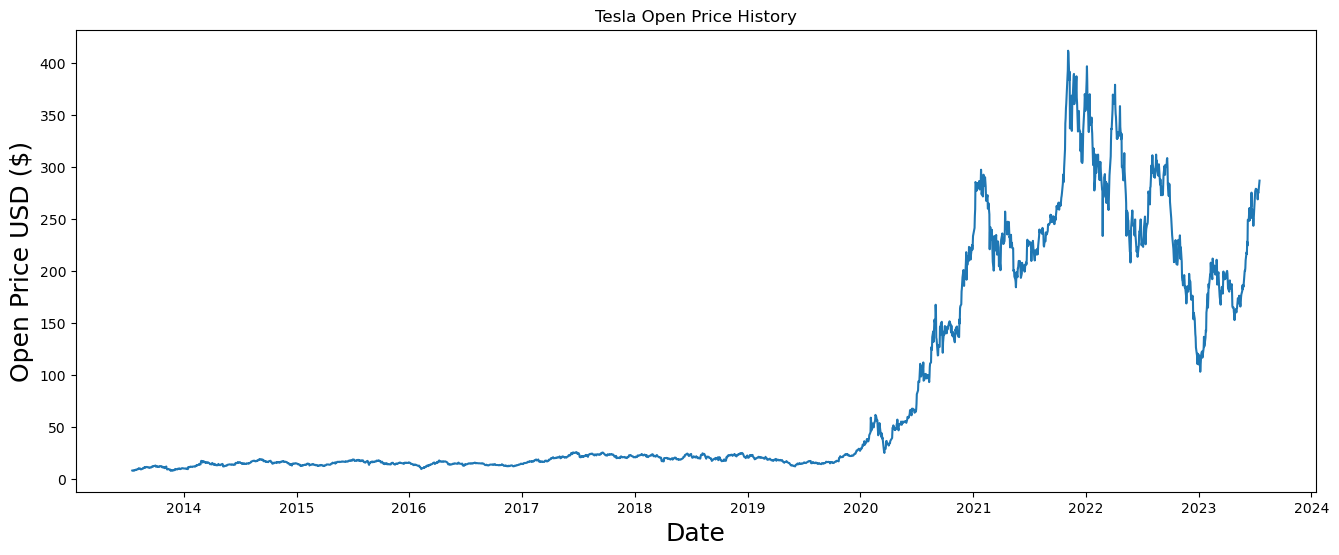

In [53]:
# Plotting the close price history
plt.figure(figsize=(16,6))
plt.title('Tesla Open Price History')
plt.plot(tsla_data['Date'], tsla_data['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()

In [54]:
tsla_data.isna().any()

Company       False
Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

In [55]:
tsla_data.tail(10)

,Company,Date,Close/Last,Volume,Open,High,Low
17621,TSLA,2023-07-03,279.82,118999000,276.490,284.25,275.11
17620,TSLA,2023-07-05,282.48,131530900,278.820,283.85,277.60
17619,TSLA,2023-07-06,276.54,120707400,278.090,279.97,272.88
17618,TSLA,2023-07-07,274.43,113879200,278.430,280.78,273.77
17617,TSLA,2023-07-10,269.61,119425400,276.470,277.52,265.10
17616,TSLA,2023-07-11,269.79,91972360,268.650,270.90,266.37
17615,TSLA,2023-07-12,271.99,95672140,276.325,276.52,271.46
17614,TSLA,2023-07-13,277.90,112681500,274.590,279.45,270.60
17613,TSLA,2023-07-14,281.38,120062400,277.010,285.30,276.31
17612,TSLA,2023-07-17,290.38,131569600,286.625,292.23,283.57


In [56]:
tsla_data.describe()

,Close/Last,Volume,Open,High,Low
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,83.265228,1.152436e+08,83.282714,85.205097,81.263506
std,104.487703,7.792288e+07,104.571977,107.057352,101.913039
min,7.935300,1.065415e+07,7.900000,8.036700,7.740000
25%,15.146200,6.623726e+07,15.180975,15.400000,14.927300
50%,20.608700,9.287259e+07,20.640300,20.971000,20.239050
75%,162.660000,1.374413e+08,163.370000,166.178325,159.110000
max,409.970000,9.140809e+08,411.470000,414.496600,405.666600


In [57]:
tsla_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 20127 to 17612
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Company     2516 non-null   object        
 1   Date        2516 non-null   datetime64[ns]
 2   Close/Last  2516 non-null   float64       
 3   Volume      2516 non-null   int64         
 4   Open        2516 non-null   float64       
 5   High        2516 non-null   float64       
 6   Low         2516 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 157.2+ KB


In [58]:
tsla_data.isnull().sum()

Company       0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [59]:
# Split training and testing datasets

df_test = tsla_data.tail(40)
tsla_df = tsla_data.iloc[::-1]

In [60]:
tsla_df['Open'].mean()

83.28271383147857

c:\Users\Kha Nguyen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Kha Nguyen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Kha Nguyen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

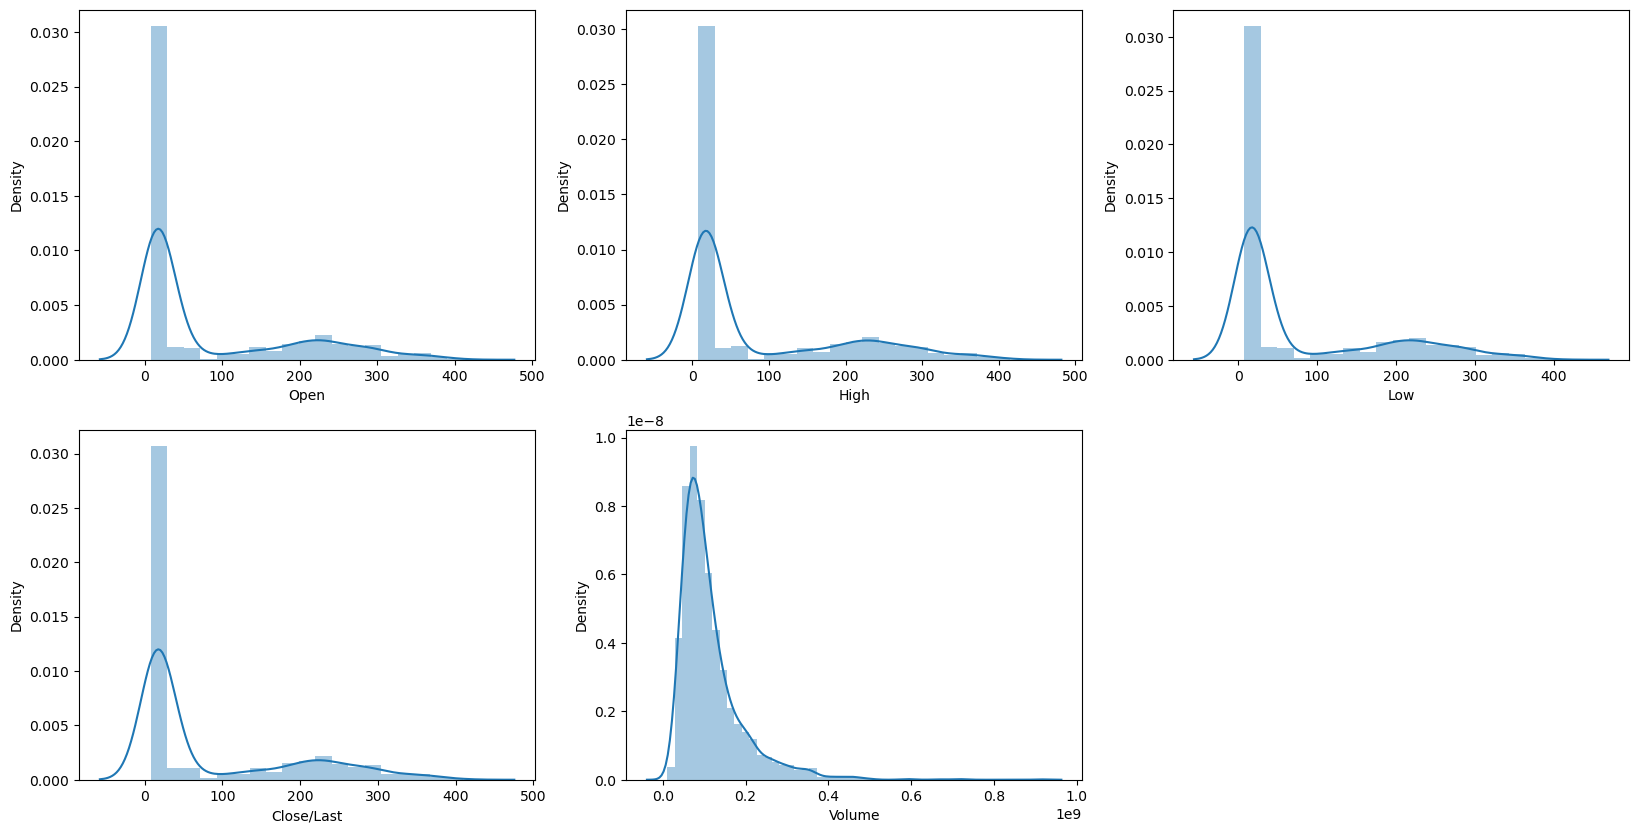

In [61]:
import seaborn as sb
features = ['Open', 'High', 'Low', 'Close/Last', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(tsla_data[col])
plt.show()

In [62]:
tsla_data.describe()

,Close/Last,Volume,Open,High,Low
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,83.265228,1.152436e+08,83.282714,85.205097,81.263506
std,104.487703,7.792288e+07,104.571977,107.057352,101.913039
min,7.935300,1.065415e+07,7.900000,8.036700,7.740000
25%,15.146200,6.623726e+07,15.180975,15.400000,14.927300
50%,20.608700,9.287259e+07,20.640300,20.971000,20.239050
75%,162.660000,1.374413e+08,163.370000,166.178325,159.110000
max,409.970000,9.140809e+08,411.470000,414.496600,405.666600


In [63]:
tsla_data

,Company,Date,Close/Last,Volume,Open,High,Low
20127,TSLA,2013-07-18,7.9353,170465465,8.0647,8.1820,7.7453
20126,TSLA,2013-07-19,7.9787,88259401,7.9000,8.0367,7.7673
20125,TSLA,2013-07-22,8.1620,146957822,7.9927,8.4453,7.9920
20124,TSLA,2013-07-23,8.1827,116031182,8.2667,8.3707,8.1213
20123,TSLA,2013-07-24,8.1133,102998094,8.2980,8.3000,7.9707
...,...,...,...,...,...,...,...
17616,TSLA,2023-07-11,269.7900,91972360,268.6500,270.9000,266.3700
17615,TSLA,2023-07-12,271.9900,95672140,276.3250,276.5200,271.4600
17614,TSLA,2023-07-13,277.9000,112681500,274.5900,279.4500,270.6000
17613,TSLA,2023-07-14,281.3800,120062400,277.0100,285.3000,276.3100


c:\Users\Kha Nguyen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Kha Nguyen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Kha Nguyen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Kha Ngu

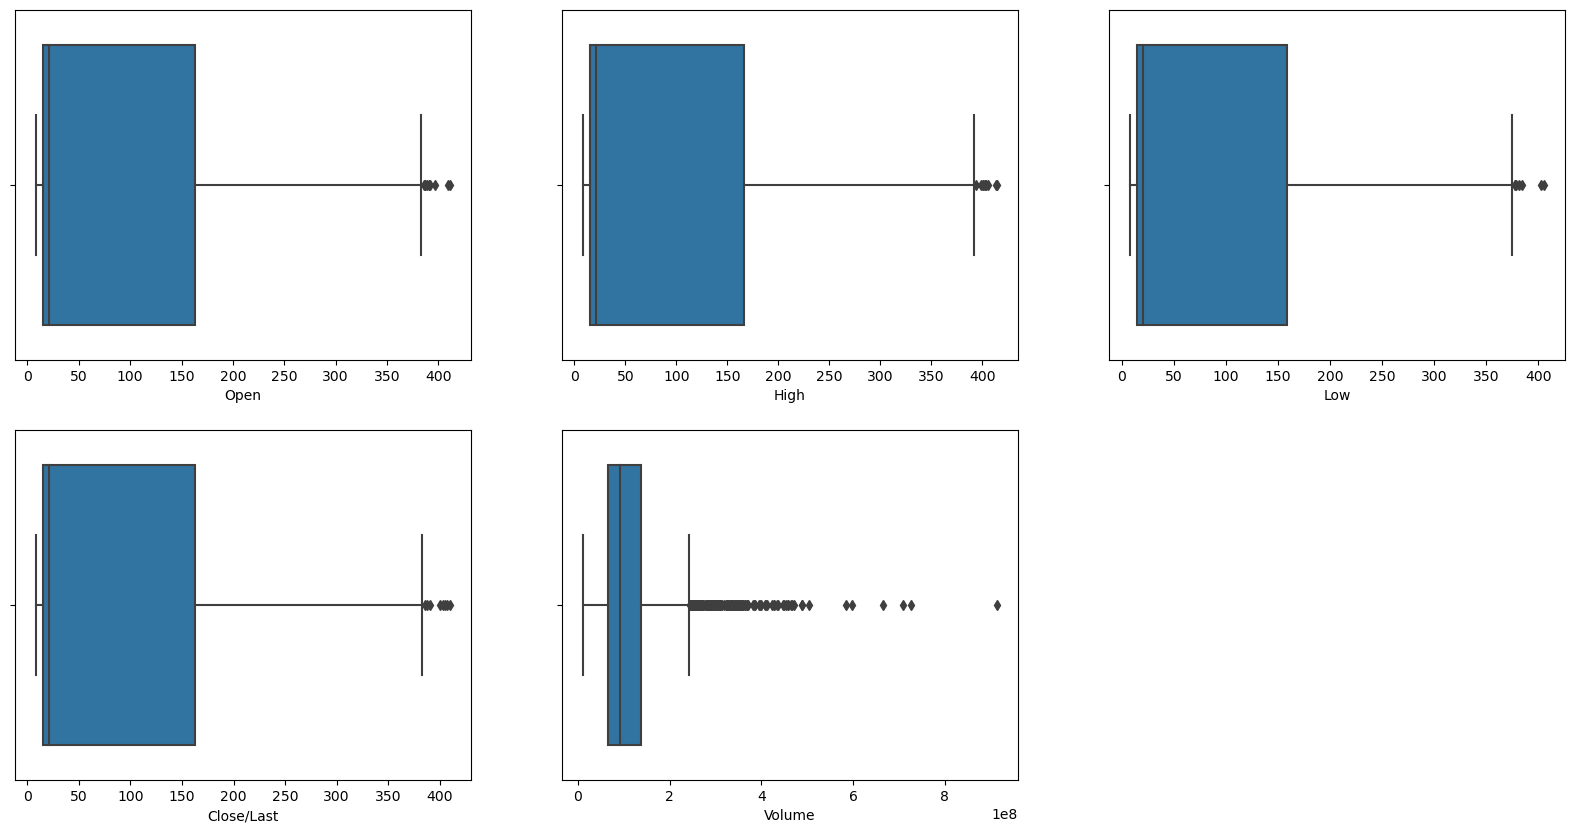

In [64]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(tsla_data[col])
plt.show()

In [65]:
tsla_data["Date"] = tsla_data["Date"].astype(str) 
splitted = tsla_data['Date'].str.split('-', expand=True)
 
tsla_data['day'] = splitted[2].astype('int')
tsla_data['month'] = splitted[1].astype('int')
tsla_data['year'] = splitted[0].astype('int')
 
tsla_data.head()

,Company,Date,Close/Last,Volume,Open,High,Low,day,month,year
20127,TSLA,2013-07-18,7.9353,170465465,8.0647,8.1820,7.7453,18,7,2013
20126,TSLA,2013-07-19,7.9787,88259401,7.9000,8.0367,7.7673,19,7,2013
20125,TSLA,2013-07-22,8.1620,146957822,7.9927,8.4453,7.9920,22,7,2013
20124,TSLA,2013-07-23,8.1827,116031182,8.2667,8.3707,8.1213,23,7,2013
20123,TSLA,2013-07-24,8.1133,102998094,8.2980,8.3000,7.9707,24,7,2013


In [66]:
tsla_data.tail(5)

,Company,Date,Close/Last,Volume,Open,High,Low,day,month,year
17616,TSLA,2023-07-11,269.79,91972360,268.650,270.90,266.37,11,7,2023
17615,TSLA,2023-07-12,271.99,95672140,276.325,276.52,271.46,12,7,2023
17614,TSLA,2023-07-13,277.90,112681500,274.590,279.45,270.60,13,7,2023
17613,TSLA,2023-07-14,281.38,120062400,277.010,285.30,276.31,14,7,2023
17612,TSLA,2023-07-17,290.38,131569600,286.625,292.23,283.57,17,7,2023


In [67]:
tsla_data.isnull().sum()

Company       0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
day           0
month         0
year          0
dtype: int64

In [68]:
tsla_data['is_quarter_end'] = np.where(tsla_data['month']%3==0,1,0)
tsla_data.head()

,Company,Date,Close/Last,Volume,Open,High,Low,day,month,year,is_quarter_end
20127,TSLA,2013-07-18,7.9353,170465465,8.0647,8.1820,7.7453,18,7,2013,0
20126,TSLA,2013-07-19,7.9787,88259401,7.9000,8.0367,7.7673,19,7,2013,0
20125,TSLA,2013-07-22,8.1620,146957822,7.9927,8.4453,7.9920,22,7,2013,0
20124,TSLA,2013-07-23,8.1827,116031182,8.2667,8.3707,8.1213,23,7,2013,0
20123,TSLA,2013-07-24,8.1133,102998094,8.2980,8.3000,7.9707,24,7,2013,0


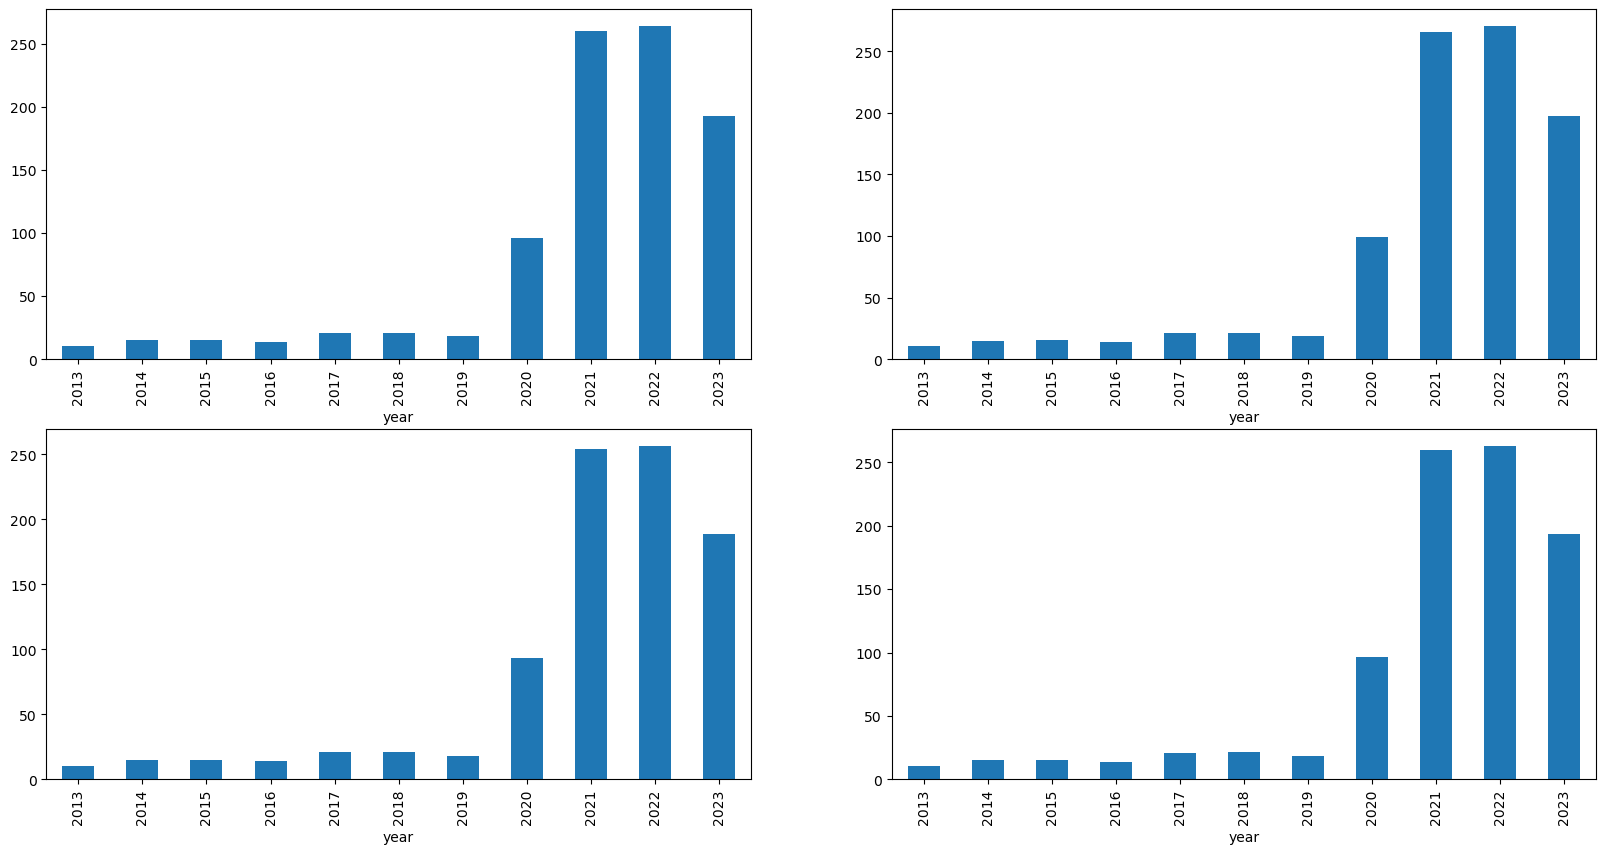

In [69]:
data_grouped = tsla_data.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close/Last']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [70]:
tsla_data.groupby('is_quarter_end').mean()

,Close/Last,Volume,Open,High,Low,day,month,year
is_quarter_end,,,,,,,,
0,82.409076,1.170273e+08,82.450832,84.311442,80.440397,15.730931,6.096697,2018.040841
1,84.940309,1.117538e+08,84.910310,86.953552,82.873937,15.772033,7.431257,2018.024677


In [71]:
tsla_data['open-close']  = tsla_data['Open'] - tsla_data['Close/Last']
tsla_data['low-high']  = tsla_data['Low'] - tsla_data['High']
tsla_data['target'] = np.where(tsla_data['Close/Last'].shift(-1) > tsla_data['Close/Last'], 1, 0)


In [72]:
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

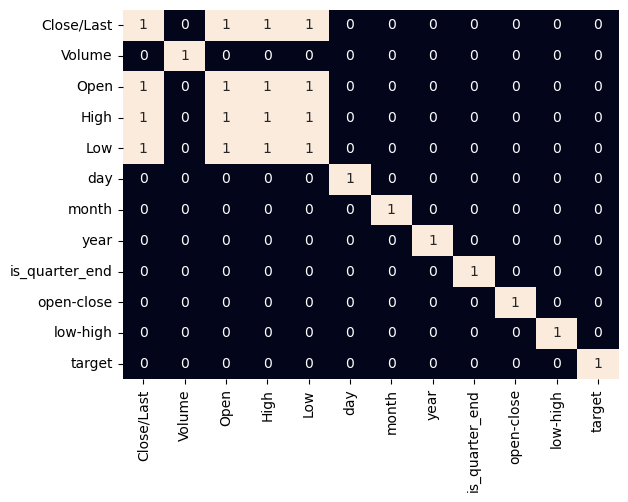

In [73]:
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(tsla_data.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
features = tsla_data[['open-close', 'low-high', 'is_quarter_end']]
target = tsla_data['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2264, 3) (252, 3)


In [50]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC

In [75]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5140954819427772
Validation Accuracy :  0.4810383032605255

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4942832601790716
Validation Accuracy :  0.5406141183918962

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

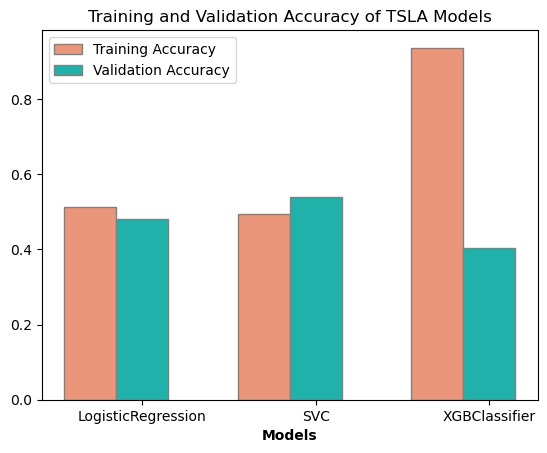

<Figure size 640x480 with 0 Axes>

In [78]:
# Model names
models_name = ['LogisticRegression', 'SVC', 'XGBClassifier']

# Training accuracy values
train_acc = [0.5140954819427772, 0.4942832601790716, 0.9371096094687875]

# Validation accuracy values
val_acc = [0.4810383032605255, 0.5406141183918962, 0.40443178220956]

# Bar width
barWidth = 0.3

# Set position of bar on X axis
r1 = np.arange(len(train_acc))
r2 = [x + barWidth for x in r1]

# Create blue bars for training accuracy
plt.bar(r1, train_acc, color='darksalmon', width=barWidth, edgecolor='grey', label='Training Accuracy')

# Create red bars for validation accuracy
plt.bar(r2, val_acc, color='lightseagreen', width=barWidth, edgecolor='grey', label='Validation Accuracy')

# Title & Subtitle
plt.title('Training and Validation Accuracy of TSLA Models')
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(train_acc))], models_name)

# Create legend & Show graphic
plt.legend()
plt.show()
plt.savefig('TSLA_plot.png')